# HR ANALYTICS - Quan Pham

Company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 
- They have provided multiple attributes around Employee's past and current performance along with demographics. 
- Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tableone import TableOne

In [21]:
train=pd.read_csv('./train_LZdllcl.csv')
test=pd.read_csv('./test_2umaH9m.csv')
sample=pd.read_csv('./sample_submission_M0L0uXE.csv')

train_raw=train
sample_raw=sample
test_raw=test
test=pd.merge(test_raw,sample_raw)
test_raw=test



## ANALYSIS PLANS

FIRST STEP
- Read the data files
- Identifying the task: to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.
- Identifying the outcome variables distribution: The ratio between Promoted/Not promoted is about 1/10

- Making Table 1: Employees characteristics and outcome of train set
- Making Table 2: Bi-variable associations of predictive factors for Outcome and variable selection

SOLUTION 1: Using Logistic regression in a statistical way
SOLUTION 2: Using SVM

## ANALYZING DATA

In [3]:
#Identifying the KPIs
train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [4]:
#How outcome is distributed
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
test.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68,0
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57,0
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85,0
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75,0
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76,0


In [8]:
test['KPIs_met >80%'].value_counts()

0    15061
1     8429
Name: KPIs_met >80%, dtype: int64

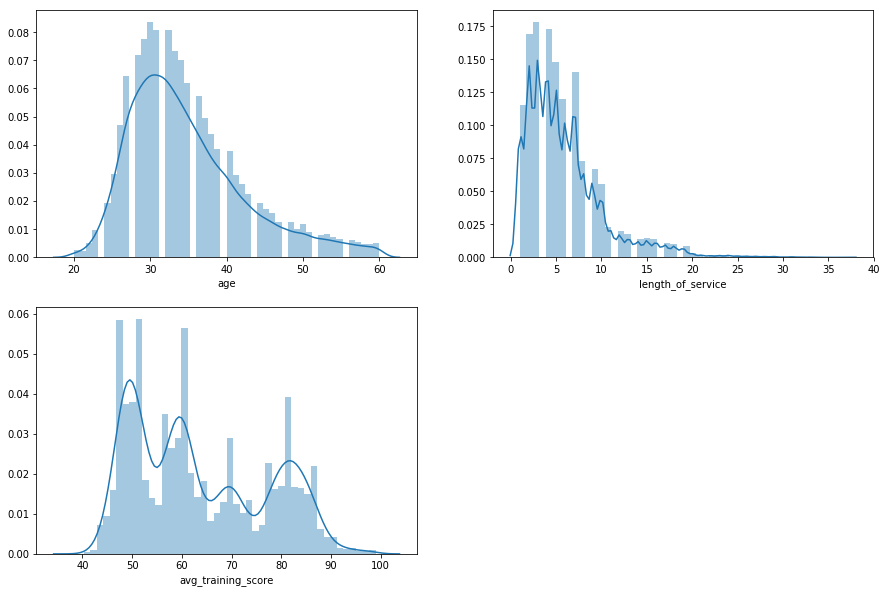

In [52]:
plt.figure(figsize=(15, 10)) # Set figsize
# Your code here
col_names = ['age', 'length_of_service','avg_training_score']
for idx, col in enumerate(col_names):
    plt.subplot(2, 2, idx+1)
    sns.distplot(train[col])
plt.show()

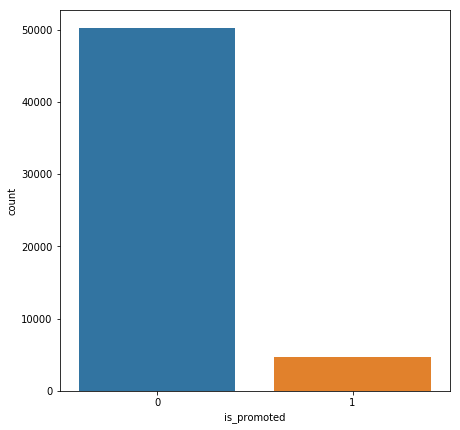

In [54]:
fig = plt.figure(figsize=(7,7)) # Set figsize
sns.countplot(data=train, x='is_promoted')
plt.show()

### TABLE 1: EMPLOYEES CHARACTERISTICS

In [9]:
columns=['department','region',
        'education',
         'gender',
         'recruitment_channel',
         'no_of_trainings',
         'age',
         'previous_year_rating',
         'length_of_service',
         'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']
categorical=['department','region',
        'education',
         'gender',
         'recruitment_channel',
         'previous_year_rating',
         'KPIs_met >80%',
 'awards_won?',
 'is_promoted']
#groupby=['is_promoted']
#labels={'nam_ch':'Nam CH'}
mytable1 = TableOne(train, columns, categorical, 
                   pval=False)
mytable1

isnull       overall
variable             level                                 
n                                                     54808
department           Analytics              0    4610 (9.5)
                     Finance                     2219 (4.6)
                     HR                          2142 (4.4)
                     Legal                        867 (1.8)
                     Operations                10547 (21.7)
                     Procurement                6641 (13.6)
                     R&D                          893 (1.8)
                     Sales & Marketing         14239 (29.3)
                     Technology                 6502 (13.4)
region               region_1               0     553 (1.1)
                     region_10                    614 (1.3)
                     region_11                   1189 (2.4)
                     region_12                    425 (0.9)
                     region_13                   2463 (5.1)
                     region_14                    770 (1.6)
                     region_15                   2512 (5.2)
                     region_16                   1319 (2.7)
                     region_17                    742 (1.5)
                     region_18                     24 (0.0)
                     region_19                    838 (1.7)
                     region_2                  10811 (22.2)
                     region_20                    780 (1.6)
                     region_21                    370 (0.8)
                     region_22                  5435 (11.2)
                     region_23                   1104 (2.3)
                     region_24                    462 (0.9)
                     region_25                    721 (1.5)
                     region_26                   1966 (4.0)
                     region_27                   1418 (2.9)
                     region_28                   1143 (2.3)
                     region_29                    896 (1.8)
                     region_3                     331 (0.7)
                     region_30                    602 (1.2)
                     region_31                   1692 (3.5)
                     region_32                    773 (1.6)
                     region_33                    260 (0.5)
                     region_34                    253 (0.5)
                     region_4                    1626 (3.3)
                     region_5                     690 (1.4)
                     region_6                     579 (1.2)
                     region_7                    4397 (9.0)
                     region_8                     578 (1.2)
                     region_9                     324 (0.7)
education            Bachelor's          2409  33404 (68.6)
                     Below Secondary              458 (0.9)
                     Master's & above          14798 (30.4)
gender               f                      0  14808 (30.4)
                     m                         33852 (69.6)
recruitment_channel  other                  0  27017 (55.5)
                     referred                    1020 (2.1)
                     sourcing                  20623 (42.4)
no_of_trainings                             0     1.3 (0.6)
age                                         0    34.8 (7.7)
previous_year_rating 1.0                 4124   5887 (12.1)
                     2.0                         4035 (8.3)
                     3.0                       17867 (36.7)
                     4.0                        9509 (19.5)
                     5.0                       11362 (23.3)
length_of_service                           0     5.9 (4.3)
KPIs_met >80%        0                      0  31314 (64.4)
                     1                         17346 (35.6)
awards_won?          0                      0  47534 (97.7)
                     1                           1126 (2.3)
avg_training_score                          0   63.4 (13.4)
is_promoted        

### TABLE 2: BI-VARIATE REGRESSION TO SELECT FACTORS

In [10]:
columns=['department','region',
        'education',
         'gender',
         'recruitment_channel',
         'no_of_trainings',
         'age',
         'previous_year_rating',
         'length_of_service',
         'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']
categorical=['department','region',
        'education',
         'gender',
         'recruitment_channel',
         'previous_year_rating',
         'KPIs_met >80%',
 'awards_won?']
groupby=['is_promoted']
labels={'is_promoted':'Promoted'}
mytable1 = TableOne(train, columns, categorical=categorical,groupby=groupby,labels=labels, 
                   pval=True)
mytable1

C:\Users\phamt\Anaconda3\lib\site-packages\tableone.py:628: UserWarning: No p-value was computed for region due to the low number of observations.
  warnings.warn('No p-value was computed for {} due to the low number of observations.'.format(v))


Grouped by Promoted                                                                              
                                                    isnull             0            1    pval                                      ptest
variable             level                                                                                                              
n                                                                  50140         4668                                                   
department           Analytics                           0    4165 (9.4)   445 (10.5)  <0.001                                Chi-squared
                     Finance                                  2037 (4.6)    182 (4.3)                                                   
                     HR                                       2021 (4.5)    121 (2.9)                                                   
                     Legal                                     825 (1.9)     42 (1.0)                                                   
                     Operations                              9568 (21.5)   979 (23.1)                                                   
                     Procurement                             5990 (13.5)   651 (15.4)                                                   
                     R&D                                       835 (1.9)     58 (1.4)                                                   
                     Sales & Marketing                      13179 (29.7)  1060 (25.0)                                                   
                     Technology                              5808 (13.1)   694 (16.4)                                                   
region               region_1                            0     498 (1.1)     55 (1.3)  <0.001  Chi-squared (warning: expected count < 5)
                     region_10                                 566 (1.3)     48 (1.1)                                                   
                     region_11                                1121 (2.5)     68 (1.6)                                                   
                     region_12                                 399 (0.9)     26 (0.6)                                                   
                     region_13                                2247 (5.1)    216 (5.1)                                                   
                     region_14                                 713 (1.6)     57 (1.3)                                                   
                     region_15                                2305 (5.2)    207 (4.9)                                                   
                     region_16                                1227 (2.8)     92 (2.2)                                                   
                     region_17                                 642 (1.4)    100 (2.4)                                                   
                     region_18                                  23 (0.1)      1 (0.0)                                                   
                     region_19                                 789 (1.8)     49 (1.2)                                                   
                     region_2                                9926 (22.3)   885 (20.9)                                                   
                     region_20                                 735 (1.7)     45 (1.1)                                                   
                     region_21                                 353 (0.8)     17 (0.4)                                                   
                     region_22                               4806 (10.8)   629 (14.9)                                                   
                     region_23                                 972 (2.2)    132 (3.1)                                                   
                     region_24                                 444

### Randomly Over-Sampling the Training Dataset

Percentage of non-promoted:  0.5
Percentage of promoted :  0.5
Total number of employees in resampled data:  100280


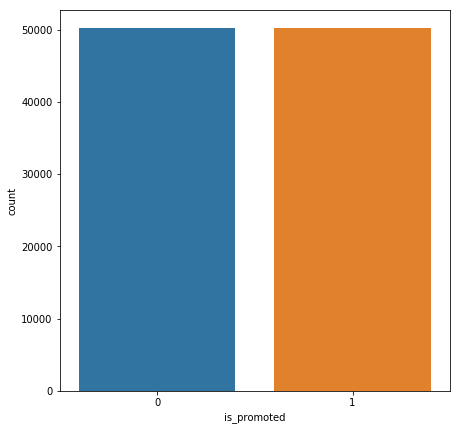

In [63]:
# promoted/non-promoted data
# Select row which "is_promoted" is 1 and save in promoted_data
promoted_data = train[train['is_promoted'] == 1]
# Select row which "is_promoted" is 0 and save in non_promoted_data
non_promoted_data = train[train['is_promoted'] == 0]

# Number of promoted, non-promoted transactions
number_records_promoted = promoted_data.shape[0]
number_records_non_promoted = non_promoted_data.shape[0]

# Using sample on promoted_data with replacement "replace = True",  since we take a larger sample than population
over_sample_promoted = promoted_data.sample(replace = True, n=number_records_non_promoted)
# **concat** over_sample_promoted and non_promoted_data to form under_sample_data
train = pd.concat([over_sample_promoted, non_promoted_data], axis=0)

# Showing ratio
print("Percentage of non-promoted: ", non_promoted_data.shape[0]/train.shape[0])
print("Percentage of promoted : ", promoted_data.shape[0]/train.shape[0])
print("Total number of employees in resampled data: ", train.shape[0])

# Assigning X, y for over-sampled dataset
X_train = train.drop(columns=['is_promoted'])
y_train = train['is_promoted']

# Plot countplot
plt.figure(figsize=(7,7))
# Make a count plot to show ratio
sns.countplot(data=train, x='is_promoted')
plt.show()

In [64]:
from sklearn.linear_model import LogisticRegression

X_train=train.drop(columns=['department','region',
        'education',
         'recruitment_channel',
         'previous_year_rating',
         'gender','is_promoted'])

y_train=train['is_promoted']

X_train.info()
model_logit=LogisticRegression()
model_logit.fit(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 40568 to 54807
Data columns (total 7 columns):
employee_id           100280 non-null int64
no_of_trainings       100280 non-null int64
age                   100280 non-null int64
length_of_service     100280 non-null int64
KPIs_met >80%         100280 non-null int64
awards_won?           100280 non-null int64
avg_training_score    100280 non-null int64
dtypes: int64(7)
memory usage: 8.6 MB


C:\Users\phamt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
from sklearn.metrics import confusion_matrix
X_test=test.drop(columns=['department','region',
        'education',
         'recruitment_channel',
         'previous_year_rating',
         'gender','is_promoted'])

X_test.info()

y_prediction = model_logit.predict(X_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 7 columns):
employee_id           23490 non-null int64
no_of_trainings       23490 non-null int64
age                   23490 non-null int64
length_of_service     23490 non-null int64
KPIs_met >80%         23490 non-null int64
awards_won?           23490 non-null int64
avg_training_score    23490 non-null int64
dtypes: int64(7)
memory usage: 1.4 MB


In [66]:
y_test=test['is_promoted']
report = confusion_matrix(y_test, prediction)
print(report)

[[23490]]


[[35865 14275]
 [14577 35563]]


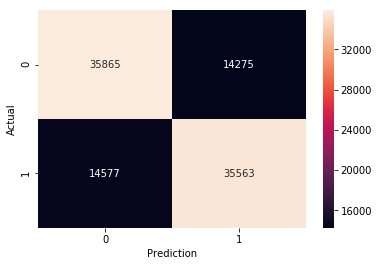

accuracy: 0.7122856003191065
misclassification: 0.2877143996808935
precision: 0.7135719731931458
prevelance: 0.5


In [67]:
y_prediction = model_logit.predict(X_train)
report = confusion_matrix(y_train, y_prediction)
print(report)

sns.heatmap(report, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

tn, fp, fn, tp = report.ravel()
(tn, fp, fn, tp)

accuracy = (tp+tn)/(tp+tn+fp+fn)
misclassification = 1-accuracy
precision = tp/(fp + tp)
prevelance = (tp + fn) / (tp+tn+fp+fn)
print('accuracy: '+str(accuracy))
print('misclassification: '+str(misclassification))
print('precision: '+str(precision))
print('prevelance: '+str(prevelance))

#### Note: Logistic regression has a fair accuracy in this situation, after the train dataset has been oversampling

## USING SVM

In [14]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [68]:
train.shape

(100280, 14)

In [ ]:
#train=train.head(1000)
X_train=train.drop(columns=['department','region',
        'education',
         'recruitment_channel',
         'previous_year_rating',
         'gender','is_promoted'])

y_train=train['is_promoted']

X_train.info()

from sklearn.svm import SVC  
model_svm = SVC(kernel='linear')  
model_svm.fit(X_train, y_train)  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 40568 to 54807
Data columns (total 7 columns):
employee_id           100280 non-null int64
no_of_trainings       100280 non-null int64
age                   100280 non-null int64
length_of_service     100280 non-null int64
KPIs_met >80%         100280 non-null int64
awards_won?           100280 non-null int64
avg_training_score    100280 non-null int64
dtypes: int64(7)
memory usage: 8.6 MB


In [18]:
y_test=test['is_promoted']
y_pred = model_svm.predict(X_test)  


[[49548   592]
 [ 4557   111]]


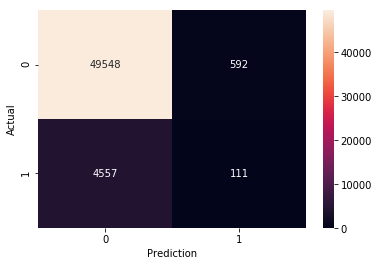

accuracy: 0.9060538607502554
misclassification: 0.0939461392497446
precision: 0.15789473684210525
prevelance: 0.08517004816815063


In [30]:
y_prediction = model_svm.predict(X_train)
report = confusion_matrix(y_train, y_prediction)
print(report)

sns.heatmap(report, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

tn, fp, fn, tp = report.ravel()
(tn, fp, fn, tp)

accuracy = (tp+tn)/(tp+tn+fp+fn)
misclassification = 1-accuracy
precision = tp/(fp + tp)
prevelance = (tp + fn) / (tp+tn+fp+fn)
print('accuracy: '+str(accuracy))
print('misclassification: '+str(misclassification))
print('precision: '+str(precision))
print('prevelance: '+str(prevelance))

### The model will tell us someone is poromoted or not, with the accuracy of 90.6%, but not with the probability of the prediction

### Conclusion: Support vector machine is a solution to predict the potential of an employee to be promoted